<a href="https://colab.research.google.com/github/Zadak-H/Heart_Attack_Prediction/blob/main/Heart_attack_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart_attack_prediction_classification**

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Algorithms -
###  1. KNeighborsClassifier
###  2. RandomForestClassifier
###  3. DecisionTreeClassifier
###  4. Support Vector Machine
###  5. Naive Byaes
###  6. Boosting Algorithm - GradientBoost, XGBoost, AdaBoost

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Import Data

In [4]:
heart_data = pd.read_csv('heart.csv')

In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# getting the number of row and column of data
heart_data.shape 

(303, 14)

In [10]:
# checking Missing Values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# checking the target values distribution
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Feature Extraction

In [12]:
import seaborn as sns
corrmat = heart_data.corr()
top_corr_features = corrmat.index

## Plot Heat Map

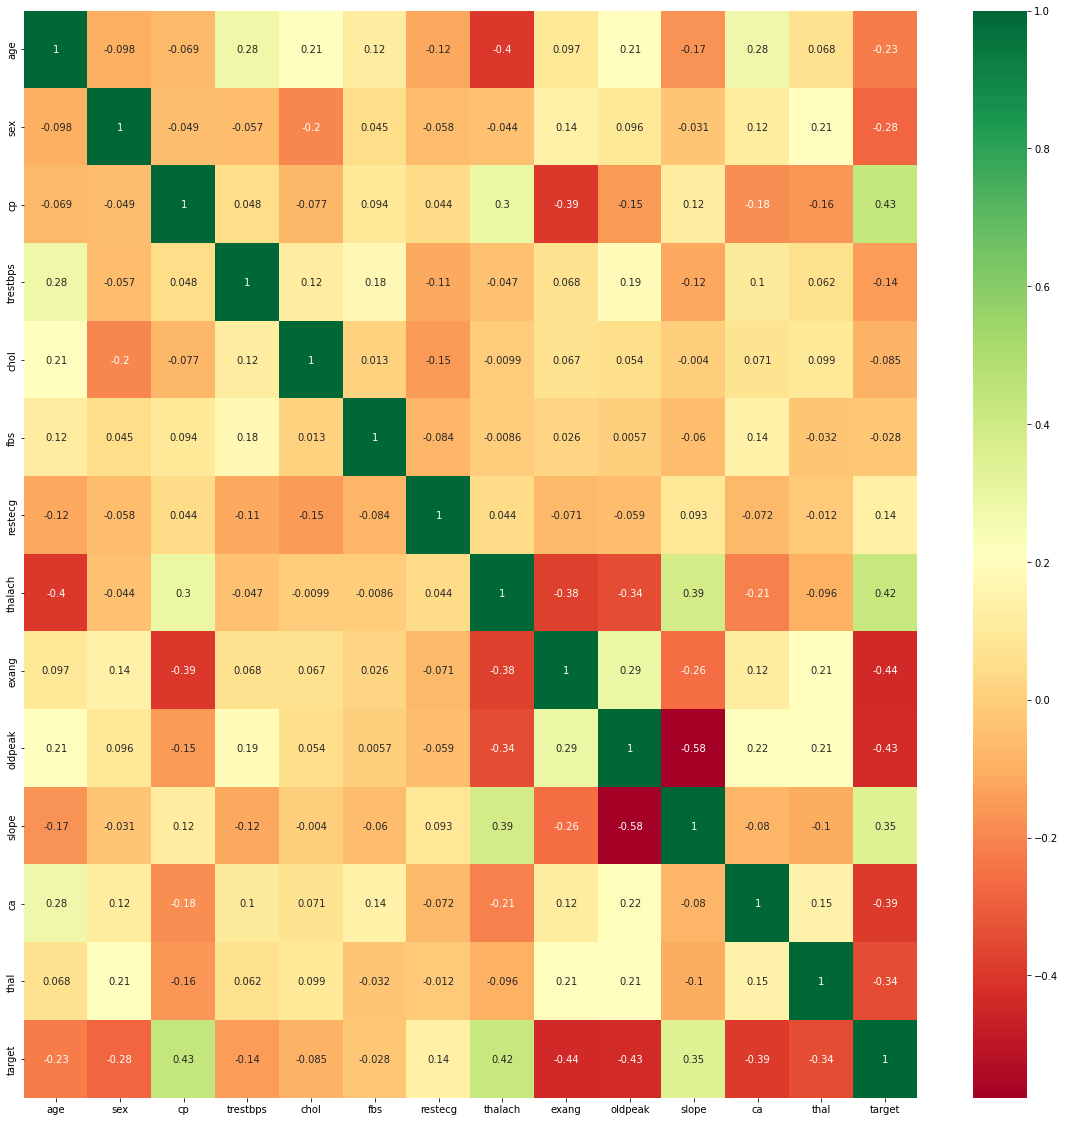

In [13]:
plt.figure(figsize = (20,20))
heat_map = sns.heatmap( heart_data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f3231090>,
      dtype=object)

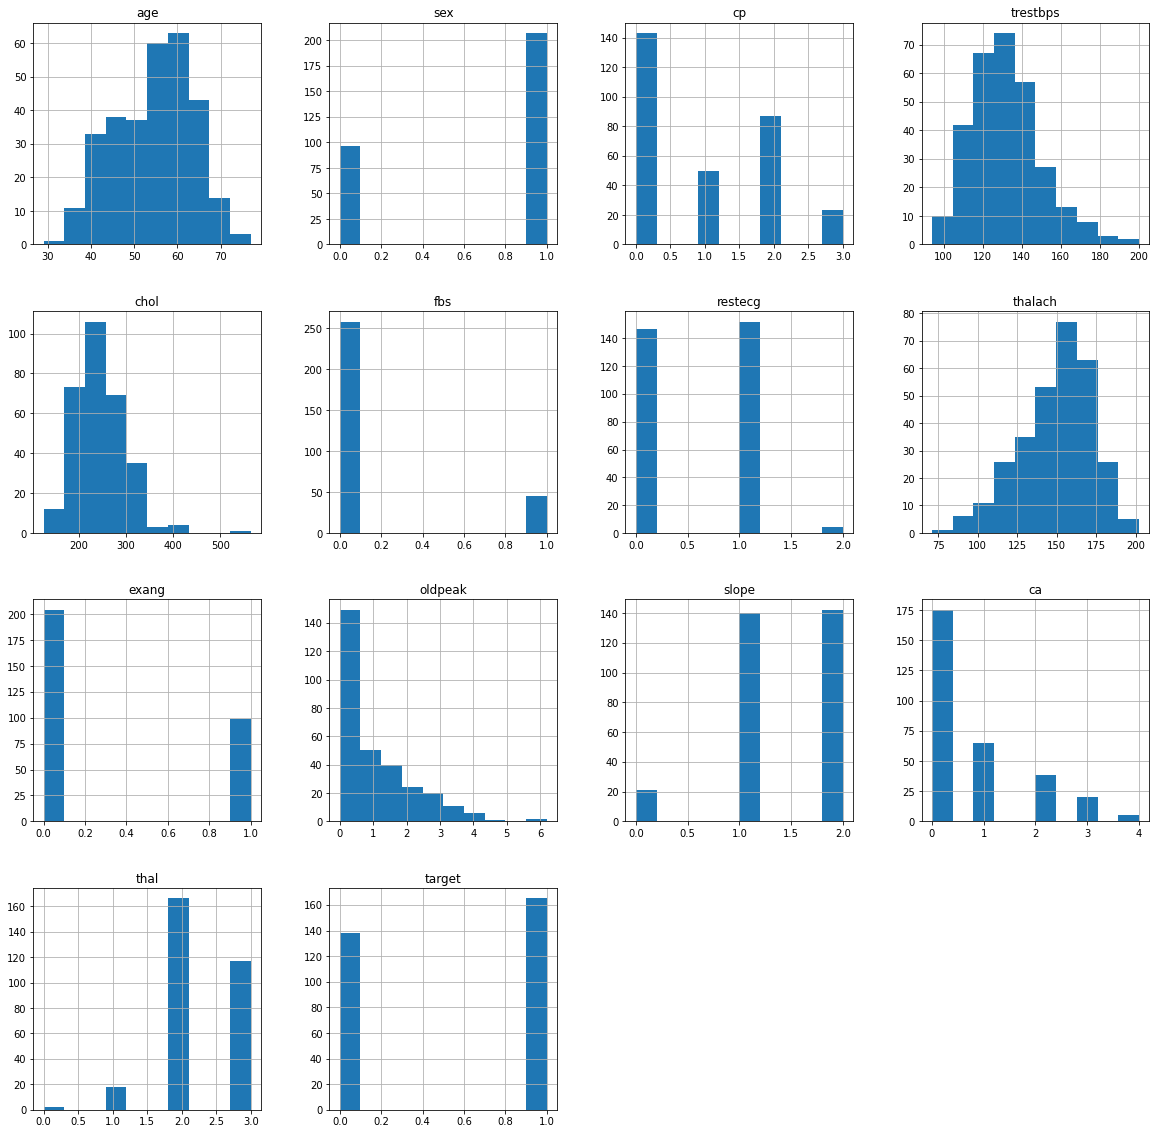

In [14]:
heart_data.hist(figsize=(20,20))

### Data Processing

In [15]:
heart_dataset = pd.get_dummies(heart_data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

### Standard Scalling

In [16]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_dataset[scale] = standardScaler.fit_transform(heart_dataset[scale])

In [17]:
heart_dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


## Test & Train Split

In [292]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=120)

## 1. KNeighborsClassifier

In [293]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

## Accuracy

In [294]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.86


Confusion Matrix :


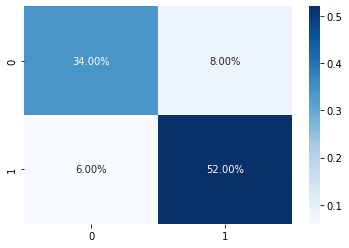

In [295]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [296]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.87      0.90      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.86       100
weighted avg       0.86      0.86      0.86       100



In [297]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 4.835492663081912


## 2. Random Forest Classifier

In [298]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=120)

In [299]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=100, random_state=50)
randomforest_classifier.fit(X_train, y_train)
y_pred = randomforest_classifier.predict(X_test)

In [300]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.881578947368421


Confusion Matrix :


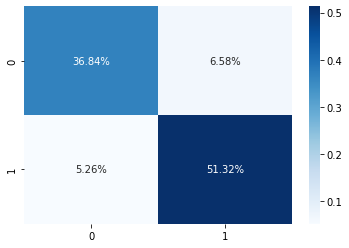

In [301]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [302]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.89      0.91      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [303]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 4.090170862386147


## 3. Decision Tree

## Train & Test

In [304]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=120)

In [305]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=3,random_state=50)
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [306]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8552631578947368


Confusion Matrix :


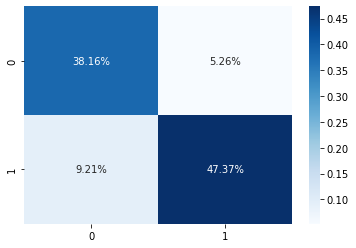

In [307]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [308]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.90      0.84      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



In [309]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 4.999075509654452


## SVM

In [310]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=120)

In [311]:
from sklearn import svm
model = svm.SVC(kernel='linear',gamma='auto', random_state=66)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [312]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8947368421052632


Confusion Matrix :


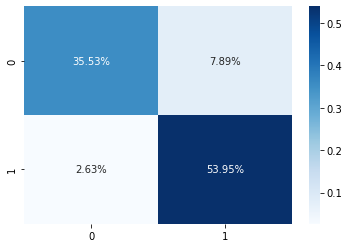

In [313]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [314]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.87      0.95      0.91        43

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [315]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 3.6357237992614033


## Naive Bayes
1. GaussianNB - Naive Bayes classifier for Guassian model.
2. BernoulliNB - Naive Bayes classifier for multivariate Bernoulli models.

### **GaussianNB**

In [316]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=120)

In [317]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [318]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7631578947368421


Confusion Matrix :


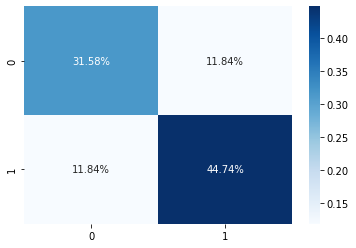

In [319]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [320]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.73      0.73      0.73        33
           1       0.79      0.79      0.79        43

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



In [321]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 8.180331203753473


## **BernoulliNB**

In [322]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

In [323]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.881578947368421


Confusion Matrix :


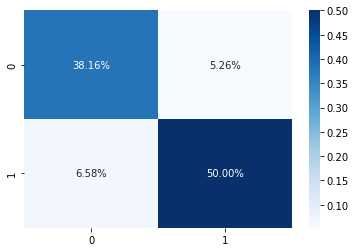

In [324]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [325]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.90      0.88      0.89        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [326]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 4.090160341367328


## **BOOSTING ALGORITHM** - GradientBoost, XGBoost, AdaBoost

### GradientBoost

In [327]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [328]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,random_state=10)
gradient_booster.fit(X_train,y_train)
y_pred = gradient_booster.predict(X_test)

In [329]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9180327868852459


Confusion Matrix :


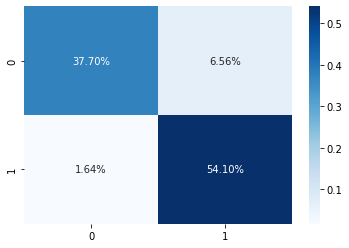

In [330]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [331]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.89      0.97      0.93        34

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



In [332]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 2.831099678102856


## **AdaBoostClassifier**

In [333]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [350]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=3,random_state=50),
                         n_estimators=100,learning_rate=1.0, algorithm='SAMME',random_state=3,)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [351]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9508196721311475


Confusion Matrix :


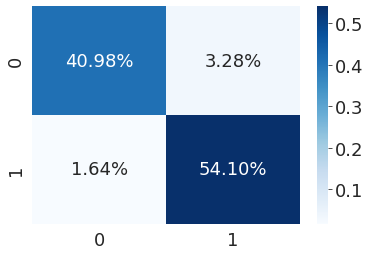

In [352]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [337]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.96        34

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [338]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 1.6986545635998769


## **XGBClassifier**

In [339]:
from sklearn.model_selection import train_test_split
y = heart_dataset['target']
X = heart_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [340]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [341]:
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9344262295081968


Confusion Matrix :


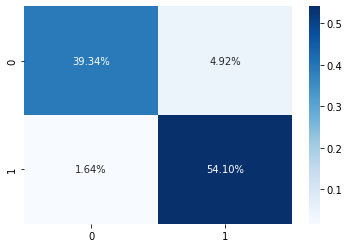

In [342]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

In [343]:
# Classification Report
from sklearn.metrics import classification_report
print ('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.92      0.97      0.94        34

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



In [344]:
# LogLOss Value
from sklearn.metrics import log_loss
print('LOGLOSS Value is',log_loss(y_test, y_pred))

LOGLOSS Value is 2.2648771208513665
